 # Automated Parking system with Machine learning

### Statement: "Design and Develop a automated parking system using ML , use pictures to detect the car numbers and allocate a parking spot "

### Goal: Understand image detection of car number plate recognition and improve the accuracy. 

### 1.  Import the required packages.

In [58]:
 import numpy as np
import cv2 as cv
import imutils
import time
from matplotlib import pyplot as plt
import pandas as pd
import pytesseract as tess
import mysql.connector
import datetime
import sys
import re
import time
import requests
import pickle

### 2.  Load the image


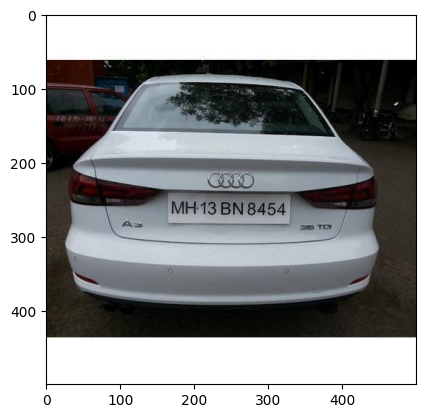

In [59]:
image = cv.imread('images/11.jpg')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

### 2.Convert the input image to grayscale

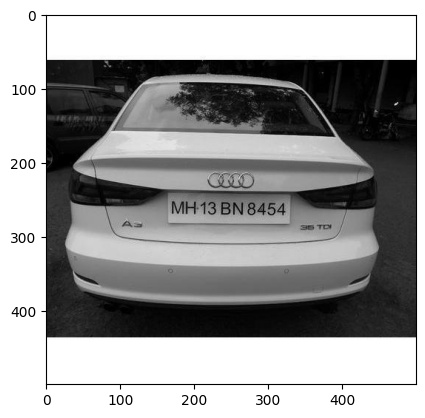

In [60]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

## 3.Remove some noise by applying a Gaussian blur

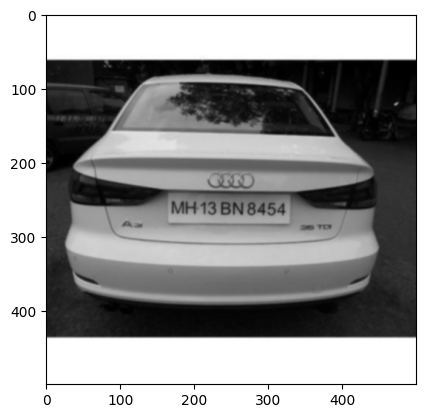

In [61]:
blur = cv.GaussianBlur(gray, (5,5), 0)
plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

# 4.Detect the edges using the Canny edge detector.

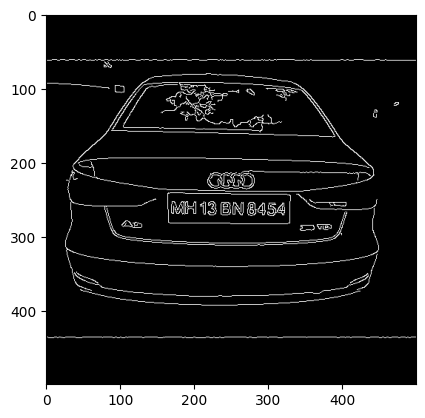

In [62]:
edged = cv.Canny(blur, 10, 200) 
plt.imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

### 5. find the contours on the image and extract the contour of the license plate

In [63]:
# find the contours, sort them, and keep only the 5 largest ones
contours, _ = cv.findContours(edged, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv.contourArea, reverse = True)[:5]
n_plate_cnt = None
    # loop over the contours
for c in contours:
    # approximate each contour
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02 * peri, True)
    # if the contour has 4 points, we can say
    # that we have found our license plate
    if len(approx) == 4:
        n_plate_cnt = approx
        break

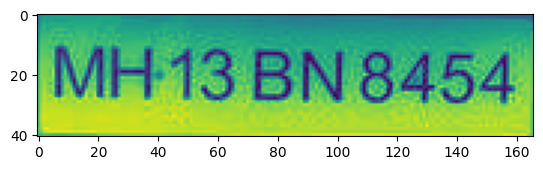

In [64]:
if  n_plate_cnt is None:
    detected = 0
    print ("No contour detected")
# get the bounding box of the contour and 
# extract the license plate from the image
(x, y, w, h) = cv.boundingRect(n_plate_cnt)
license_plate = gray[y:y + h, x:x + w]
plt.imshow(license_plate)

### 6. convert the image to text using OCR 

In [65]:
tess.pytesseract.tesseract_cmd=r'C:\Users\Abhinandan\AppData\Local\Tesseract-OCR\tesseract.exe'
text = tess.image_to_string(license_plate)

### 7. Check for the text and update it to csv file.

In [56]:
data = pd.read_csv("./data.csv")

In [ ]:
# raw_data = {'date': [time.asctime( time.localtime(time.time()) )], 
        'v_number': [text]}
df = pd.DataFrame(raw_data, columns = ['date', 'v_number'])
df.to_csv('data.csv')

# Print recognized text
print(text)

In [57]:
data.head()

,Unnamed: 0,date,v_number
0,0,Wed Nov 16 17:36:59 2022,MH13 BN8454\n


#### Finally the detected text is updated to a csv file with data and text as data.


#### Here we see car number is " MH 13 BN 8454 " and with 91.35% accuracy. 

#### If no text detected we display a message to the user.
